# А/В ТЕСТ

In [1]:
from scipy.stats import ttest_1samp
import numpy as np

import warnings          ## этот блок нужен, чтоб ошибки убирал при выводе
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Тестирование гипотез

## Гипотеза для коэффициента корелляции
Корреляция - взаимосвязь между переменными
Чаще встречается корреляция Пирсона,  именно она тут и отображена

In [ ]:
from scipy.stats import pearsonr

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = pearsonr(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Groups are different (reject H0)')
else:
    print('Groups are similar (fail to reject H0)')

# в данном случае p-value 0,028, меньше чем альфа, отвергаем нулевую гипотезу. коэф корреляции 0,68, он статичстически значим. Значит положительная стат значимая связь между выборками

stat=0.688, p=0.028
Groups are different (reject H0)


# Поработаем с датасетом c покупками

Метрики ARPU или Average Revenue Per User - средняя выручка на одного пользователя

ARPPU или Average Revenue Per Paying User - средняя выручка на одного платящего пользователя

## Подготовка данных

In [2]:
#Подгружаем данные с гугл диска
from google.colab import drive
drive.mount('/content/drive')


data = pd.read_csv('/content/drive/MyDrive/Geek Brains/ab_stats_shpargalka_5.csv')

data.head(10)

Mounted at /content/drive


,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814
5,0.0,0,0,A,9.578727
6,0.0,0,0,A,6.162601
7,0.0,0,0,A,11.909452
8,0.0,0,0,A,6.540910
9,0.0,0,0,A,7.990794


In [ ]:
# краткие данные, проверка типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [ ]:
# размерность
data.shape

(23652, 5)

In [ ]:
# числовые статистики
data.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [ ]:
# Сколько пустых значений в столбцах
data.isna().sum()

revenue          0
num_purchases    0
purchase         0
ab_group         0
av_site visit    0
dtype: int64

In [ ]:
# размер групп
data.ab_group.value_counts()

A    11835
B    11817
Name: ab_group, dtype: int64

In [ ]:
# Строчкки в которых прибыль больше нуля
data[data['revenue']>0]

,revenue,num_purchases,purchase,ab_group,av_site visit
45,1.885595,1,1,A,7.654627
54,1.002159,1,1,A,6.392489
82,2.990000,1,1,A,8.596604
104,49.990000,1,1,A,8.885633
110,22.093757,4,1,A,8.708759
...,...,...,...,...,...
23426,2.489611,1,1,B,9.015714
23493,74.950000,5,1,B,5.881950
23495,3.667866,1,1,B,7.450014
23584,19.990000,1,1,B,9.813696


## Посмотю на группы отдельно

In [ ]:
# статистика по группу А контрольная
data[data['ab_group']=='A'].describe()

,revenue,num_purchases,purchase,av_site visit
count,11835.000000,11835.000000,11835.000000,11835.000000
mean,0.404462,0.050697,0.021631,6.974724
std,13.133218,1.467511,0.145481,2.023533
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.656155
50%,0.000000,0.000000,0.000000,6.982329
75%,0.000000,0.000000,0.000000,8.345572
max,1303.609284,152.000000,1.000000,17.728836


In [ ]:
# статистика по группу В тестовая
data[data['ab_group']=='B'].describe()

,revenue,num_purchases,purchase,av_site visit
count,11817.000000,11817.000000,11817.000000,11817.000000
mean,0.244794,0.036473,0.019802,7.051559
std,3.176534,0.418480,0.139325,3.976799
min,0.000000,0.000000,0.000000,-8.286822
25%,0.000000,0.000000,0.000000,4.380984
50%,0.000000,0.000000,0.000000,7.060873
75%,0.000000,0.000000,0.000000,9.768648
max,113.830000,25.000000,1.000000,22.446822


In [ ]:
data

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814
...,...,...,...,...,...
23647,0.0,0,0,B,10.207152
23648,0.0,0,0,B,5.148761
23649,0.0,0,0,B,4.809019
23650,0.0,0,0,B,8.127488


Уже можно заметить, что максимальный чек в первой группе сильно больше, чем в группе B. Среднее очень неустойчиво к выбросам, так что необходимо будет это учесть.

# Проверка на нормальность распределения и применение статистических критериев

Метрика визиты на юзера

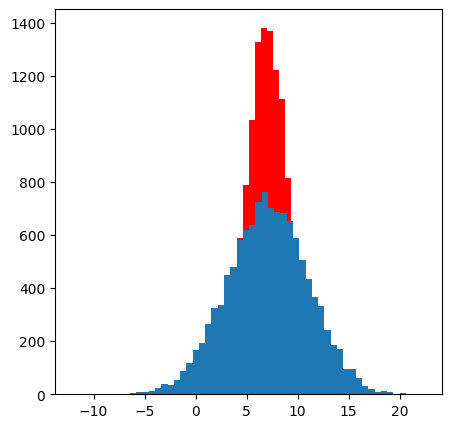

In [ ]:
plt.figure(figsize=(5, 5))
control_visit_all = data['av_site visit'][data['ab_group'] == 'A']    # по столбцу визит юзера, выведем только из категории А
test_visit_all =data['av_site visit'][data['ab_group'] == 'B']              # по столбцу визит юзера, выведем только из категории В
 

plt.hist(control_visit_all, color='r', bins=50)                           # отметим на гистограмме красным группу А
plt.hist(test_visit_all,  bins=50)                                         # отметим на гистограмме красным группу В


plt.show()

In [ ]:
import scipy.stats as stats

stats.ttest_ind(control_visit_all, test_visit_all, equal_var = False)
# equal var это указание что дисперсии не равны, и вообще чтоб были равны это редкость

Ttest_indResult(statistic=-1.872183970103851, pvalue=0.06119777801292236)

# Метрика доля юзеров с покупкой

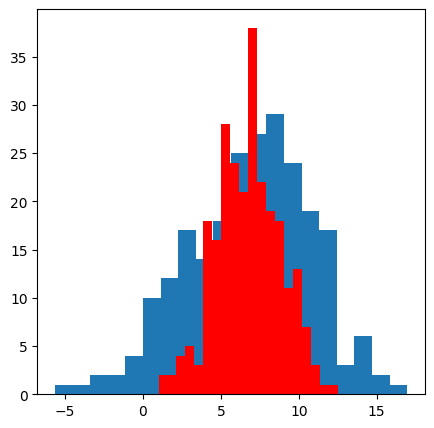

In [ ]:
plt.figure(figsize=(5, 5))
control_visit = data['av_site visit'][(data['ab_group'] == 'A')&(data['purchase'] == 1)]         # фильтрую группу, 1 означает, что пользователь совершил покупку
test_visit =data['av_site visit'][(data['ab_group'] == 'B')&(data['purchase'] == 1)]
plt.hist(test_visit,  bins=20)
plt.hist(control_visit, color='r', bins=20)

plt.show()

# синяя, тестовая группа - имеем большую дисперсию

In [ ]:
# отношение между теми кто совершил хоть одну покупку и кто не покупал
data['purchase'].value_counts()

0    23162
1      490
Name: purchase, dtype: int64

In [ ]:
# сумма всего юзеров у которых была хоть одна покупка
k1 = data[data['ab_group']=='A']['purchase'].sum()
k2 = data[data['ab_group']=='B']['purchase'].sum()

In [ ]:
# общее кол-во пользователей в группах
n1 = data[data['ab_group']=='A'].shape[0]
n2 = data[data['ab_group']=='B'].shape[0]

In [ ]:
from statsmodels.stats import proportion              # метрика пропорции. можно применить z критерий пропорции

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]),                     # передаю массив из числителей и знаменателей
                                                   np.array([n1, n2]))
print('Results are ','z_score =%.3f, pvalue = %.3f'%(z_score, z_pvalue))

Results are  z_score =0.987, pvalue = 0.323


In [ ]:
if abs(z_pvalue) < 0.05:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")

We have failed to reject the null hypothesis


p-value = 0.323 > 5% значит Н0 не можем отвергнуть в пользу альтернативной

Перепроверю проверкой Хи квадрат
## Непараметрический Хи-квадрат

In [ ]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                   np.array([n1, n2]))

print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =0.975, pvalue = 0.323


In [ ]:
if abs(pvalue) < 0.05:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")

We have failed to reject the null hypothesis


Резултат p-value не меняется, так же не можем отклонить Н0 в пользу альтернативной, доля платящих пользователей статистически не различается в двух группах

# Метрика arpu - средняя выручка на пользователя

### Непараметрический критерий Манн-Уитни

In [ ]:
data.groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,11835.0,0.404462,13.133218,0.0,0.0,0.0,0.0,1303.609284
B,11817.0,0.244794,3.176534,0.0,0.0,0.0,0.0,113.830000


видно, что в гр А средняя выручка больше чем в гр В. Данные по выручке чаще всего распределены не нормально, и для этого можно применить критерий Мана Уитни

In [ ]:
# разница между платящими пользователями
from scipy.stats import mannwhitneyu

mw_stats = mannwhitneyu(x=data[(data['ab_group'] == 'A')&(data['purchase'] == 1)]['revenue'].values,
                                                  y=data[(data['ab_group'] == 'B')&(data['purchase'] == 1)]['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

Критерий Мана Уитни так же говорит, что стат значимых разлиий в группах нет, Мы не можем принять альтернативную гипотезу о разнице arpu

## проверю отличия в среднем колличестве покупок на пользователя


In [ ]:
mw_stats = mannwhitneyu(x=data[data['ab_group'] == 'A']['num_purchases'].values,
                                                  y=data[data['ab_group'] == 'B']['num_purchases'].values)
mw_stats

MannwhitneyuResult(statistic=70054599.0, pvalue=0.3249718497892071)

так же стат значимых раздличий между группами нет

### Вывод, выкатывать изменения с тестовой группы не нажно. Т.К статистических различий между тестовой и контрольной группой НЕТ. Оснований отвергнуть нулевую гипотезу НЕТ

# Рассмотрю кейс с рекламной выручкой
Есть ли стат отличия между средней выручкой на пользователя в контрольной и тествой группах ?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1IGMgJP_XqQwA6h_w1KYG7TQJhS15h4c4',
                                    dest_path='./test.xlsx');

In [ ]:
df = pd.read_excel('test.xlsx')

In [ ]:
df.head(10)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
5,2380,variant,0.0
6,2849,control,0.0
7,9168,control,0.0
8,6205,variant,0.0
9,7548,control,0.0


In [ ]:
df.info()
# нулевых строк нет, фена флоат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [ ]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [ ]:
df.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [ ]:
# размеры групп
df.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [ ]:
#Избавлюсь от некорретных строк. Посчитю, сколько типов встречается у каждого пользователя. Мб вдруг у каких либо пользоватлей есть повторные встречания

v = df.\
    groupby('USER_ID', as_index=False).\
    agg({'VARIANT_NAME': pd.Series.nunique})

In [ ]:
v.head(10)

,USER_ID,VARIANT_NAME
0,2,1
1,3,2
2,4,1
3,5,1
4,6,1
5,9,1
6,10,2
7,11,1
8,12,1
9,13,1


видно, что некоторые пользователи попали и в тестовую и в контрольную группы, их нужно удалить

In [ ]:
# Фильтрую юзеров у которых больше 1 встречания
more_than_one_types = v.query('VARIANT_NAME > 1')

In [ ]:
# Удалю повторяющихся пользовтелей
df_new = df[~df.USER_ID.isin(more_than_one_types.USER_ID)].sort_values('USER_ID')

In [ ]:
df_new.shape

(6070, 3)

In [ ]:
df.shape

(10000, 3)

### видно, что большое кол-во пользователей удалилось

In [ ]:
# разделим выборки на контрольную и тестовую
control = df_new.query('VARIANT_NAME == "control"')

test = df_new.query('VARIANT_NAME == "variant"')

In [ ]:
len(control)

3026

In [ ]:
len(test)

3044

In [ ]:
# наблюдений меньше 5 тыс, применю критерий Шапиро Уилка
from scipy.stats import shapiro

In [ ]:
alpha = 0.05

st = shapiro(df.REVENUE)
print('Distribution is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]));

Distribution is not normal



Показывает, что распределение не нормальное

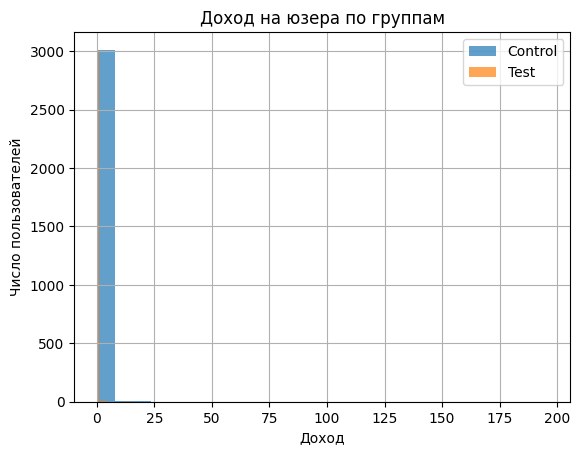

In [ ]:
# отображу визуально, распределение
control.REVENUE.hist(bins = 25, alpha =0.7, label='Control')
test.REVENUE.hist(bins = 25, alpha =0.7, label='Test')
plt.title('Доход на юзера по группам')
plt.xlabel('Доход')
plt.ylabel('Число пользователей')
plt.legend();

In [ ]:
# проверю критерием Мана Уитни
mw_stats = mannwhitneyu(x=control.REVENUE.values,
                        y=test.REVENUE.values)
                        
mw_stats

MannwhitneyuResult(statistic=4622832.0, pvalue=0.2444173738649208)

pvalue больше 10%, стат значимости нет

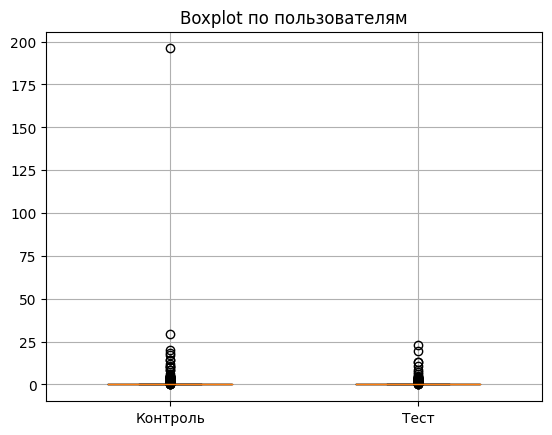

In [ ]:
# Построю бокс плот
plt.boxplot([control.REVENUE,test.REVENUE],
            labels=['Контроль','Тест'],
            widths=0.5
           )
plt.title('Boxplot по пользователям',  loc='center')
plt.grid(axis  ='both')

In [ ]:
# Посмотрю, что покажет ттест. хотя данные не нормально распределены
stats.ttest_ind(control.REVENUE.values, test.REVENUE.values, equal_var = False)

Ttest_indResult(statistic=1.403762252371675, pvalue=0.1604844017690842)

pvalue = 0,16 так же видно. что стат значимости нет

## Перед тем как сделать выводы, нужно проверить мощность теста

# Расчет мощности,   
S_pooled - объединенное стандартное отклонение
### d = (M1 – M2) / S_pooled


### S_pooled =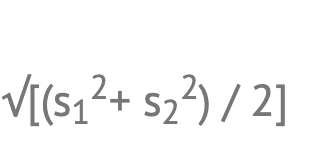

In [ ]:
C_mean = control.REVENUE.values.mean()       # среднее в контрольной группе
T_mean = test.REVENUE.values.mean()           # среднее в тестовой группе
C_std = control.REVENUE.values.std()            # стандартное отклонение в контрольной группе
T_std = test.REVENUE.values.std()                # стандартное отклонение в тестовой группе

In [ ]:
# размеры групп
print(len(control.REVENUE.values), len(test.REVENUE.values))

3026 3044


In [ ]:
# lдлина выборки
n =  len(control.REVENUE.values)

In [ ]:
##S = np.sqrt((sd_t**2 / n_t) + (sd_c**2 / n_c))      ЭТА ФОРМУЛА ЕСЛИ ГРУППЫ СОВСЕМ НЕ РАВНЫ, он нужен для расчета разницы  между мат ожиданиями

S = np.sqrt((T_std**2 + C_std **2)/ 2)

In [ ]:
# разница между мат ожиданиями
ef = float((C_mean - T_mean)/ S)
ef

0.0360905955737073

In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis

alpha = 0.05

analysis = TTestIndPower()
result = analysis.solve_power(ef, power=None,                    # передаем ef рассчитанный выше, мощность не знаем
nobs1=n, ratio=1.0, alpha=alpha)                                 # nobs1 - кол во наблюдений, ratio = 1 это значит, что группы равны по длинне

result

0.2893670730459212

### Мощность равна 0,28 - 28 %, этого недостаточно, мы не можем быть уверены в верности результатов теста. 

# Общий итог по тесту:
* Нет стат значимости по ключевой метрике
* Сам тест вызывает вопросы: пользователи попадали и в тестовую и в контрольную группу
* Очень большая дисперсия в данных
* Мощьность низкая

## Учитывая пункты выше нужно пересчитать объем выборки и перезапустить тест.